Homework 4 Assignment 1

Author - dp1618


Test if the distribution of ages is the same using the Pearson's Test, Spearman's Test and KS Test for:
1. day and night riders 
2. male and female riders

Alpha (confidence level) = .05 for all tests

In [41]:
#import statements
import os
import pandas as pd
import pylab as pl
import numpy as np
%pylab inline
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [42]:
#imort csv
df = pd.read_csv('201501-citibike-tripdata.csv')
print df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


# Test if the Distributions of Ages are the same by Gender (Male vs Female)

Use the following tests:
1. The Pearson's Test
2. The Spearman's Test
3. The KS Test

In [43]:
#separate the data into male and female and extracting the age

df['ageM'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

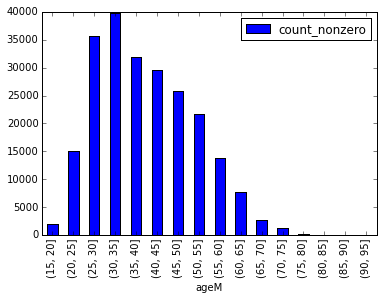

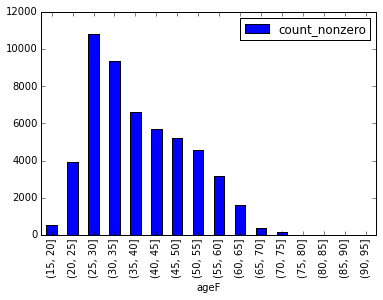

In [44]:
#plot the dataset in 5 year bins ranging from 10 - 99
bins = np.arange(15,99,5)

df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar', color='blue')
df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar', color='blue')

          count_nonzero
ageM                   
(15, 20]       0.001657
(20, 25]       0.010955
(25, 30]       0.060955
(30, 35]       0.065548
(35, 40]       0.052146
(40, 45]       0.031750
(45, 50]       0.018657
(50, 55]       0.011015
(55, 60]       0.010957
(60, 65]       0.008149
(65, 70]       0.003203
(70, 75]       0.000663
(75, 80]       0.000188
(80, 85]       0.000002
(85, 90]            NaN
(90, 95]            NaN


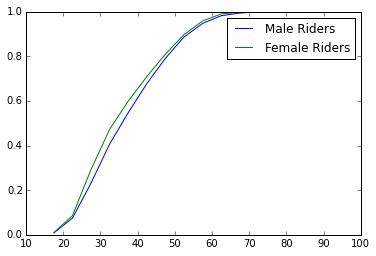

In [45]:
#find the cumulative sums of male and female riders

csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()
csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print np.abs(csM / csM.max()-csF / csF.max())
pl.plot(bins[:-1] + 2.5, csM / csM.max(), label = "Male Riders")
pl.plot(bins[:-1] + 2.5, csF / csF.max(), label = "Female Riders")
pl.legend()

#KS Test

In [46]:
ks=scipy.stats.ks_2samp(df.ageM[~np.isnan(df.ageM)], df.ageF[~np.isnan(df.ageF)])
print ks

(0.067442557802207204, 4.0408611999082294e-168)


the KS statistic is 0.6744 and the p-value is 0.0.  Because the p-value is less than 0.05, we can reject the null hypothesis. 

#Pearson's Test

In [47]:
#Find Length of Men and Women so the pearson test is the same length
print len(df.ageM[~np.isnan(df.ageM)])
print len(df.ageF[~np.isnan(df.ageF)])

227764
52093


In [48]:
#since there are more men than women, we will take a random sample of the men for this month
dfm = df.ageM[~np.isnan(df.ageM)]
np.random.seed(4)
size = len(df.ageF[~np.isnan(df.ageF)])
df_M = np.random.choice(dfm, size, replace = False)

In [49]:
pearson=scipy.stats.pearsonr(df_M, df.ageF[~np.isnan(df.ageF)])
print pearson

(-0.0017834160256778241, 0.68398192530838275)


The Pearson's Statistic is -0.0017 which means the two distributions are uncorrelated.  Because the p - value is .683 which is greater than 0.05, we fail to reject the null hypothesis. 

#Spearman's Test

In [50]:
spearman = scipy.stats.spearmanr(df_M, df.ageF[~np.isnan(df.ageF)], axis=0)
print spearman

(-0.0020452259508791353, 0.64065054005208411)


The Spearman's Statistic is -0.002 which means the two distributions are uncorrelated.  Because the p - value is .640 which is greater than 0.05, we fail to reject the null hypothesis.

# Test if the Distributions of Ages are the same by Day and Night 
Day will be defined as trip start times between 6AM and 6PM
Night will be defined as trip start times between 6PM and 6AM

Use the following tests:
1. The Pearson's Test
2. The Spearman's Test
3. The KS Test

In [51]:
#separate the data into day and night and extract the age
df['starthour'] = pd.DatetimeIndex(df['starttime']).hour
df['ageDay'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['starthour'] >= 6) & (df['starthour'] < 18)]
df['ageNight'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & ((df['starthour'] < 6) | (df['starthour'] >= 18))]

In [52]:
print df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'ageM', u'ageF', u'starthour',
       u'ageDay', u'ageNight'],
      dtype='object')


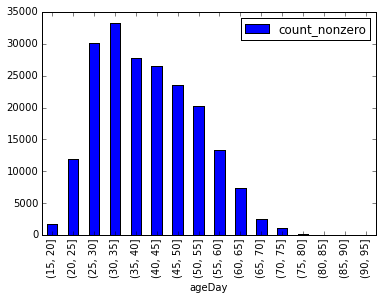

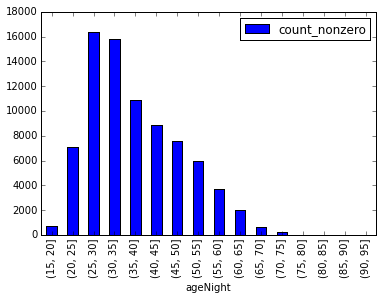

In [53]:
#plot the dataset in 5 year bins ranging from 10 - 99
bins = np.arange(15,99,5)
df.ageDay.groupby(pd.cut(df.ageDay, bins)).agg([count_nonzero]).plot(kind='bar', color='blue')
df.ageNight.groupby(pd.cut(df.ageNight, bins)).agg([count_nonzero]).plot(kind='bar', color='blue')

          count_nonzero
ageDay                 
(15, 20]       0.001004
(20, 25]       0.030151
(25, 30]       0.083225
(30, 35]       0.113519
(35, 40]       0.109824
(40, 45]       0.087678
(45, 50]       0.064716
(50, 55]       0.038266
(55, 60]       0.018294
(60, 65]       0.006470
(65, 70]       0.002574
(70, 75]       0.000243
(75, 80]       0.000113
(80, 85]       0.000104
(85, 90]            NaN
(90, 95]       0.000000


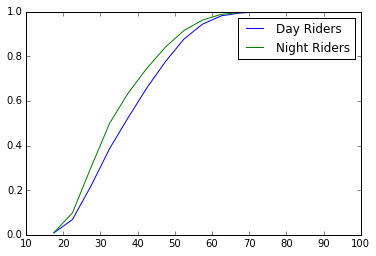

In [54]:
#find the cumulative sums of day and night riders

csD=df.ageDay.groupby(pd.cut(df.ageDay, bins)).agg([count_nonzero]).cumsum()
csN=df.ageNight.groupby(pd.cut(df.ageNight, bins)).agg([count_nonzero]).cumsum()

print np.abs(csD / csD.max() - csN / csN.max())
pl.plot(bins[:-1] + 2.5, csD / csD.max(), label = "Day Riders")
pl.plot(bins[:-1] + 2.5, csN / csN.max(), label = "Night Riders")
pl.legend()

# KS Test

In [55]:
ks=scipy.stats.ks_2samp(df.ageDay[~np.isnan(df.ageDay)], df.ageNight[~np.isnan(df.ageNight)])
print ks

(0.11692645003739066, 0.0)


the KS statistic is 0.11 and the p-value is 0.0.  Because the p-value is less than 0.05, we can reject the null hypothesis. 

#Pearson Test

In [56]:
#Find Length of Day and Night so the pearson test is the same length
print len(df.ageDay[~np.isnan(df.ageDay)])
print len(df.ageNight[~np.isnan(df.ageNight)])

199657
80267


In [57]:
#since there are more daytime riders than night time riders 
#we will take a random sample of the day riders for this month
dfd = df.ageDay[~np.isnan(df.ageDay)]
np.random.seed(4)
size = len(df.ageNight[~np.isnan(df.ageNight)])
df_Day = np.random.choice(dfd, size, replace = False)

In [58]:
pearson=scipy.stats.pearsonr(df_Day, df.ageNight[~np.isnan(df.ageNight)])
print pearson

(0.0051477939352901703, 0.14472187692372945)


The Pearson's Statistic is 0.0051 which means the two distributions are uncorrelated.  Because the p - value is .1447 which is greater than 0.05, we fail to reject the null hypothesis. 

#Spearman's Test

In [59]:
spearman = scipy.stats.spearmanr(df_Day, df.ageNight[~np.isnan(df.ageNight)])
print spearman

(0.0067130983677148159, 0.057183096591026862)


The Spearman's Statistic is 0.0067 which means the two distributions are uncorrelated.  Because the p - value is .0572 which is greater than 0.05, we fail to reject the null hypothesis.